<a href="https://colab.research.google.com/github/wwefddd/Numerical-Analysis-Chebyshev/blob/main/Numerical_Analysis_Spline_10_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

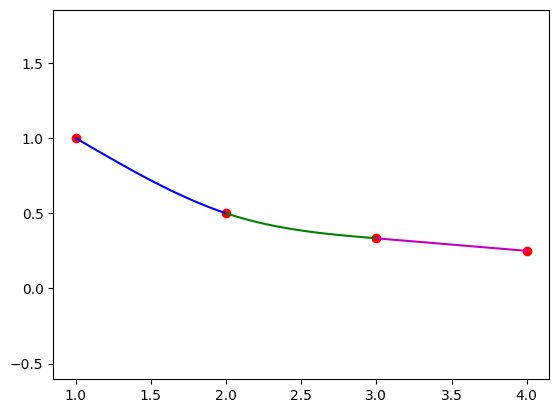

[0.33333333 0.08333333]


In [ ]:
# 하드코딩

import numpy as np
import matplotlib.pyplot as plt

N = 4 # 점 개수
xp = np.zeros(N)
yp = np.zeros(N)
xp[:] = [1,2,3,4] # x좌표
yp[:] = [1, 1/2, 1/3, 1/4] # y좌표

A = np.zeros((N-2, N-2))
A[0, :] = [2/3, 1/6] # A의 0행 (컴퓨터에서는 0행 1행 2행 이렇게 있음)
A[1, :] = [1/6, 2/3] # 즉 이거는 행렬 A의 모습을 그대로 드러냄
# 만약 추가 하고 싶으면 A[2, :] = [ , ] 형태 추가

M = np.zeros(N)

B = np.zeros(N-2)
B[:] = [1/3, 1/12] # B 벡터

Ainv = np.linalg.inv(A)
M[1 : N-1] = np.dot(Ainv, B)

nSample = 30
j = 1
x1 = np.linspace(xp[j-1], xp[j], nSample)
s1 = ( (xp[j] - x1 ) **3 * M[j-1] + (x1 - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x1 ) * yp[j-1] + (x1 - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x1) * M[j-1] + (x1 - xp[j-1]) * M[j])

j = 2
x2 = np.linspace(xp[j-1], xp[j], nSample)
s2 = ( (xp[j] - x2 ) **3 * M[j-1] + (x2 - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x2 ) * yp[j-1] + (x2 - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x2) * M[j-1] + (x2 - xp[j-1]) * M[j])

j = 3
x3 = np.linspace(xp[j-1], xp[j], nSample)
s3 = ( (xp[j] - x3 ) **3 * M[j-1] + (x3 - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x3 ) * yp[j-1] + (x3 - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x3) * M[j-1] + (x3 - xp[j-1]) * M[j])

"""
추가 예시 : 그냥 이것만 복붙해도 됨

j = 4
x4 = np.linspace(xp[j-1], xp[j], nSample)
s4 = ( (xp[j] - x4 ) **3 * M[j-1] + (x4 - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x4 ) * yp[j-1] + (x4 - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x4) * M[j-1] + (x4 - xp[j-1]) * M[j])
"""

plt.plot(xp, yp, 'ro')
plt.plot(x1, s1, '-b')
plt.plot(x2, s2, '-g')
plt.plot(x3, s3, '-m')
#plt.plot(x4, s4, '-k')
plt.axis('equal')
plt.show()

# 다 계산하고 나서 print(A), print(B) 써서 똑같은 가중치 나오는지 확인
# 결과 제출할때print(A), print(B) 제거, 하드코딩 부분만 제출

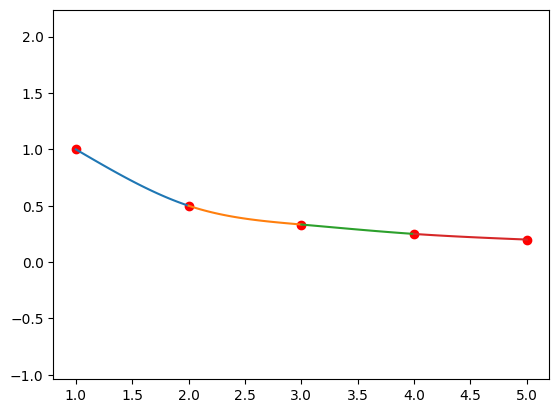

[[0.66666667 0.16666667 0.        ]
 [0.16666667 0.66666667 0.16666667]
 [0.         0.16666667 0.66666667]]
[0.33333333 0.08333333 0.03333333]


In [ ]:
# 날먹코딩
import numpy as np
import matplotlib.pyplot as plt

N = 5 # 점 개수
#xp = 10 * np.random. rand(N) #np.zeros(N)
#xp = np.sort(xp)
#yp = np.random.rand(N)
xp = np.zeros(N)
yp = np.zeros(N)
xp[:] = [1,2,3,4,5] # x 좌표
yp[:] = [1, 1/2, 1/3, 1/4, 1/5] # y 좌표

A = np.zeros((N-2, N-2))
A[0, 0] = (xp[2] - xp[0]) / 3
A[0, 1] = (xp[2] - xp[1]) / 6
A[N-3, N-4] = (xp[N-2] - xp[N-3]) / 6
A[N-3, N-3] = (xp[N-1] - xp[N-3]) / 3

for j in range(1, N-3):
  A[j, j] = (xp[j+1] - xp[j-1]) / 3
  A[j, j-1] = (xp[j] - xp[j-1]) / 6
  A[j, j+1] = (xp[j+1] - xp[j]) / 6
M = np.zeros(N)

B = np.zeros(N-2)

for j in range(0, N-2):
  B[j] = ( yp[j+2] - yp[j+1]) / (xp[j+2] - xp[j+1]) - (yp[j+1] - yp[j]) / (xp[j+1] - xp[j])

Ainv = np.linalg.inv(A)
M[1 : N-1] = np.dot(Ainv, B)


plt.plot(xp, yp, 'ro')
nSample = 30

for j in range(1, N):
  x = np.linspace(xp[j-1], xp[j], nSample)
  s_x = ( (xp[j] - x ) **3 * M[j-1] + (x - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x ) * yp[j-1] + (x - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x) * M[j-1] + (x - xp[j-1]) * M[j])
  plt.plot(x, s_x)

plt.axis('equal')
plt.show()
print(A) # A 값의 원래 성분들은 분수로 있었다. 이 분수들을 유추하자
print(B) # B 값의 원래 성분들은 분수로 있었다. 이 분수들을 유추하자


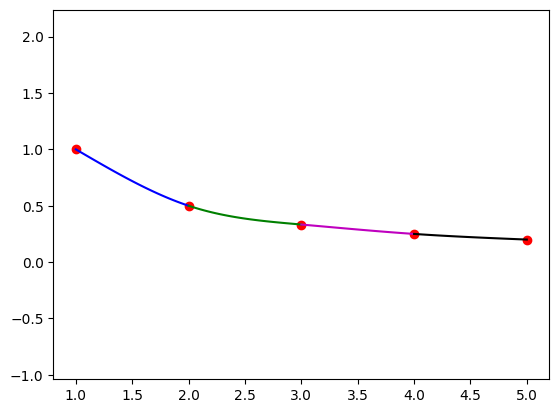

[[0.66666667 0.16666667 0.        ]
 [0.16666667 0.66666667 0.16666667]
 [0.         0.16666667 0.66666667]]
[0.33333333 0.08333333 0.03333333]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
xp = np.zeros(N)
yp = np.zeros(N)
xp[:] = [1,2,3,4, 5]
yp[:] = [1, 1/2, 1/3, 1/4, 1/5]

A = np.zeros((N-2, N-2))
A[0, :] = [2/3, 1/6, 0]
A[1, :] = [1/6, 2/3, 1/6]
A[2, :] = [0, 1/6, 2/3 ]

M = np.zeros(N)

B = np.zeros(N-2)
B[:] = [1/3, 1/12, 1/30]

Ainv = np.linalg.inv(A)
M[1 : N-1] = np.dot(Ainv, B)

nSample = 30
j = 1
x1 = np.linspace(xp[j-1], xp[j], nSample)
s1 = ( (xp[j] - x1 ) **3 * M[j-1] + (x1 - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x1 ) * yp[j-1] + (x1 - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x1) * M[j-1] + (x1 - xp[j-1]) * M[j])

j = 2
x2 = np.linspace(xp[j-1], xp[j], nSample)
s2 = ( (xp[j] - x2 ) **3 * M[j-1] + (x2 - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x2 ) * yp[j-1] + (x2 - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x2) * M[j-1] + (x2 - xp[j-1]) * M[j])

j = 3
x3 = np.linspace(xp[j-1], xp[j], nSample)
s3 = ( (xp[j] - x3 ) **3 * M[j-1] + (x3 - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x3 ) * yp[j-1] + (x3 - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x3) * M[j-1] + (x3 - xp[j-1]) * M[j])

j = 4
x4 = np.linspace(xp[j-1], xp[j], nSample)
s4 = ( (xp[j] - x4 ) **3 * M[j-1] + (x4 - xp[j-1] ) ** 3 * M[j] ) / (6 * (xp[j] - xp[j-1]) ) + ( (xp[j] - x4 ) * yp[j-1] + (x4 - xp[j-1]) * yp[j])  / (xp[j] - xp[j-1]) - 1/6 * (xp[j] - xp[j-1] ) * ( (xp[j] - x4) * M[j-1] + (x4 - xp[j-1]) * M[j])

plt.plot(xp, yp, 'ro')
plt.plot(x1, s1, '-b')
plt.plot(x2, s2, '-g')
plt.plot(x3, s3, '-m')
plt.plot(x4, s4, '-k')
plt.axis('equal')
plt.show()

print(A)
print(B)